<h1>Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Rangos-de-tiempo" data-toc-modified-id="Rangos-de-tiempo-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rangos de tiempo</a></span><ul class="toc-item"><li><span><a href="#de-Eventos" data-toc-modified-id="de-Eventos-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>de Eventos</a></span></li><li><span><a href="#de-creación-de-usuarios" data-toc-modified-id="de-creación-de-usuarios-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>de creación de usuarios</a></span></li></ul></li></ul></li><li><span><a href="#Eventos-con-importe-cero" data-toc-modified-id="Eventos-con-importe-cero-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eventos con importe cero</a></span></li><li><span><a href="#Qué-es-lo-primero-que-hacen-los-usuarios?" data-toc-modified-id="Qué-es-lo-primero-que-hacen-los-usuarios?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Qué es lo primero que hacen los usuarios?</a></span><ul class="toc-item"><li><span><a href="#Cuánto-tardan-en-realizar-el-primer-evento?" data-toc-modified-id="Cuánto-tardan-en-realizar-el-primer-evento?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cuánto tardan en realizar el primer evento?</a></span></li><li><span><a href="#Cuánto-gastan-por-primera-vez?" data-toc-modified-id="Cuánto-gastan-por-primera-vez?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cuánto gastan por primera vez?</a></span></li></ul></li><li><span><a href="#Medidas" data-toc-modified-id="Medidas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Medidas</a></span><ul class="toc-item"><li><span><a href="#Media-diaria-de-uso-de-monedas" data-toc-modified-id="Media-diaria-de-uso-de-monedas-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Media diaria de uso de monedas</a></span></li></ul></li><li><span><a href="#Por-plataforma" data-toc-modified-id="Por-plataforma-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Por plataforma</a></span></li></ul></div>

El objetivo del ejercicio es obtener conclusiones interesantes y accionables sobre los datos de
utilización de monedas (soft currency) en el juego Preguntados.

Está compuesto por los siguientes campos:
- user_id: identificador anonimizado del usuario.
- user_creation_time: fecha y hora en que se registró el usuario (UTC).
- platform: plataforma del usuario. Puede ser Android o iOS.
- event_time: fecha y hora en que se registró el evento de gasto de monedas (UTC).
- sink_channel: tipo de bien o beneficio obtenido a cambio de las monedas.
- amount_spent: cantidad de monedas gastadas.
- coins_balance: saldo en monedas del usuario, luego de haberse efectuado el gasto.

posibles métricas
1. media semanal de uso de monedas
1. media semanal de uso de monedas por usuario
1. importe del primer evento por usuario
1. consumo por día de la semana
1. consumo por producto (sink_channel)

cosas interesantes para ver:
1. predecir cuándo será el próximo evento
1. predecir el importe del próximo evento
1. predecir próximo item a comprar

# EDA

In [56]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [167]:
def get_df_metadata(df):
    df_meta = df.dtypes.to_frame().rename({0:'dtypes'},axis=1)
    df_meta['count'] = df.count()
    df_meta['nulls'] = df.isnull().sum()
    df_meta['nunique'] = df.nunique()

    return df_meta

In [38]:
df = pd.read_csv('../data/data_analyst_exercise_dataset.csv')

In [39]:
get_df_metadata(df)

,dtypes,nulls,nunique
user_id,object,0,95388
user_creation_time,object,0,95384
platform,object,0,2
event_time,object,0,2040261
sink_channel,object,0,7
amount_spent,float64,0,54
coins_balance,float64,24,31843


In [40]:
# convierto tipos y agrego columnas auxiliares
def get_week(d):
    start = d - pd.Timedelta(days=d.weekday())
    end = start + pd.Timedelta(days=6)
    return end

df['user_creation_time'] = pd.DatetimeIndex(df.user_creation_time)
df['event_time'] = pd.DatetimeIndex(df.event_time)
df['event_time_short'] = df['event_time'].dt.strftime("%Y-%m-%d")

# df["date"] = pd.DatetimeIndex(df.start_time).normalize()
df["event_hour"] = pd.DatetimeIndex(df.event_time).hour
df['event_weekday'] = pd.DatetimeIndex(df.event_time).weekday
df['event_weekdate_short'] = df["event_time"].apply(get_week).dt.strftime("%Y-%m-%d")

In [136]:
df = df.merge(pd.get_dummies(df.sink_channel),left_index=True, right_index=True)

In [180]:
get_df_metadata(df)

,dtypes,count,nulls,nunique
user_id,object,2041568,0,95388
user_creation_time,"datetime64[ns, UTC]",2041568,0,95384
platform,object,2041568,0,2
event_time,"datetime64[ns, UTC]",2041568,0,2040261
sink_channel,object,2041568,0,7
amount_spent,float64,2041568,0,54
coins_balance,float64,2041544,24,31843
event_hour,int64,2041568,0,24
event_weekday,int64,2041568,0,7
event_weekdate_short,object,2041568,0,5


In [170]:
balance_is_null = df.coins_balance.isnull()

get_df_metadata(df[balance_is_null])


,dtypes,count,nulls,nunique
user_id,object,24,0,3
user_creation_time,"datetime64[ns, UTC]",24,0,3
platform,object,24,0,1
event_time,"datetime64[ns, UTC]",24,0,24
sink_channel,object,24,0,2
amount_spent,float64,24,0,6
coins_balance,float64,0,24,0
event_hour,int64,24,0,7
event_weekday,int64,24,0,5
event_weekdate_short,object,24,0,4


In [6]:
user_null_balance = df.user_id.isin(df[balance_is_null].user_id.values)
df[user_null_balance].shape

(895, 7)

## Rangos de tiempo 

### de Eventos

In [7]:
display(df.event_time.min())
display(df.event_time.max())

'2018-07-01T00:06:23.328Z'

'2018-07-28T23:59:59.988Z'

### de creación de usuarios 

In [8]:
display(df.user_creation_time.min())
display(df.user_creation_time.max())

'2018-07-01T00:00:04.311Z'

'2018-07-21T23:59:55.658Z'

# Eventos con importe cero

- son casi todos de Android (87305 vs 4 de ios)
- todos corresponden al tipo de bien/beneficio sink_1
- los usuarios únicos son 15507


In [243]:
amount_is_zero = df.amount_spent == 0

df[amount_is_zero].platform.value_counts()
# .plot.bar()
# plt.ylabel('')
# plt.title('platform')

Android    87305
iOS            4
Name: platform, dtype: int64

15507

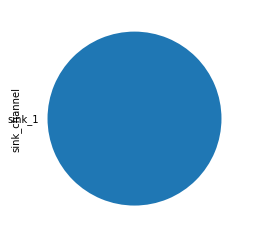

In [242]:
df[amount_is_zero].sink_channel.value_counts().plot.pie()

display(df[amount_is_zero].user_id.nunique())

# Qué es lo primero que hacen los usuarios?

In [9]:
df_usr_first_event = df.sort_values(['user_creation_time', 'event_time']).drop_duplicates('user_id', keep='first')

In [182]:
df_usr_first_event['event_time'] = pd.DatetimeIndex(df_usr_first_event.event_time)
df_usr_first_event['user_creation_time'] = pd.DatetimeIndex(df_usr_first_event.user_creation_time)

## Cuánto tardan en realizar el primer evento?

In [186]:
get_df_metadata(df_usr_first_event)

,dtypes,count,nulls,nunique
user_id,object,95388,0,95388
user_creation_time,"datetime64[ns, UTC]",95388,0,95382
platform,object,95388,0,2
event_time,"datetime64[ns, UTC]",95388,0,95386
sink_channel,object,95388,0,7
amount_spent,float64,95388,0,28
coins_balance,float64,95385,3,7136
first_event_delay,timedelta64[ns],95388,0,94986


In [204]:
df_usr_first_event['first_event_delay'] = (df_usr_first_event.event_time - df_usr_first_event.user_creation_time).dt.seconds

In [299]:
df_usr_first_event.first_event_delay.mean() /60 /60

6.456566691943547

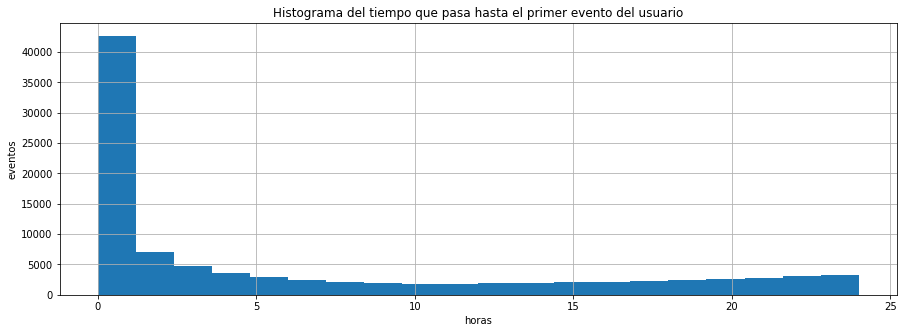

In [307]:
(df_usr_first_event.first_event_delay /60 /60).hist(bins=20, figsize=(15,5));
plt.xlabel('horas')
plt.ylabel('eventos')
plt.title('Histograma del tiempo que pasa hasta el primer evento del usuario');

In [251]:
df_first = df_usr_first_event.groupby(['platform','sink_channel']).agg({'user_id': pd.Series.count,}).unstack(0)

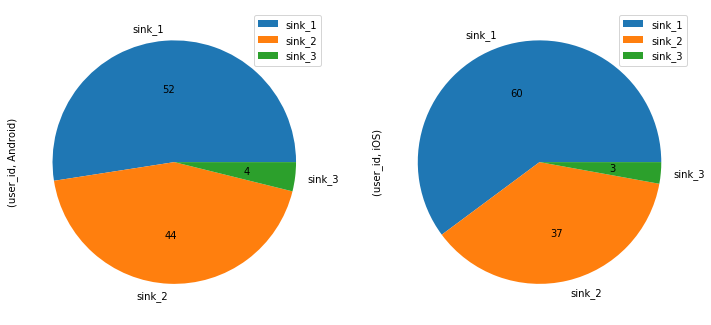

In [277]:
main_sink = (df_first / df_first.sum() * 100) > 1
df_first[main_sink].dropna().plot.pie(autopct='%0.0f', subplots=True, figsize=(12,6));

## Cuánto gastan por primera vez? 

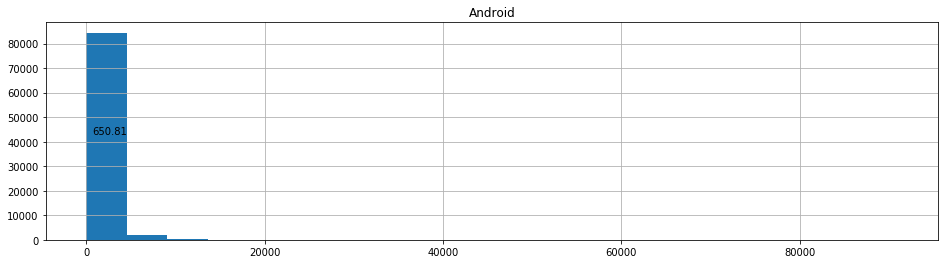

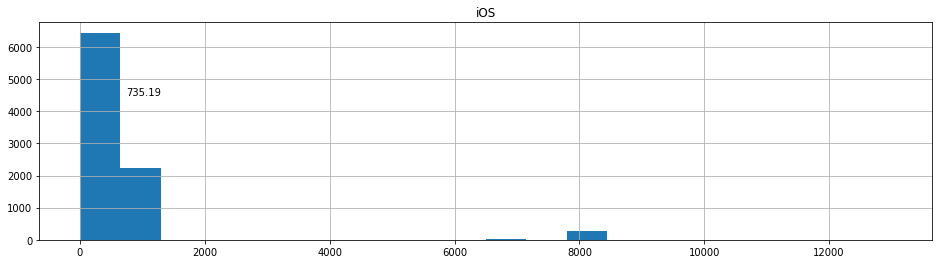

In [323]:
for p in df_usr_first_event.platform.unique():
    platform_filter = df_usr_first_event.platform == p
    df_usr_first_event[platform_filter].amount_spent.hist(bins=20, figsize=(16,4))
    x = df_usr_first_event[platform_filter].amount_spent.mean()
    y = df_usr_first_event[platform_filter].amount_spent.count()/2
    plt.text(x, y, '{:.2f}'.format(x))
    plt.title(p)
    plt.show()

# Medidas

## Media diaria de uso de monedas

In [217]:
df.groupby(['event_time_short','platform']).agg({'amount_spent': [pd.Series.count,pd.Series.mean]},).unstack()

amount_spent                                
                        count                mean            
platform              Android     iOS     Android         iOS
event_time_short                                             
2018-07-01            19782.0  2008.0  442.551815  573.169821
2018-07-02            24852.0  2357.0  464.811685  659.806958
2018-07-03            29100.0  3060.0  503.731959  674.864379
2018-07-04            31668.0  2629.0  443.751421  596.896158
2018-07-05            33427.0  3418.0  443.501959  578.698069
2018-07-06            37022.0  3828.0  467.195181  588.885841
2018-07-07            58004.0  4800.0  534.650369  751.591667
2018-07-08            72304.0  6422.0  510.384488  777.032856
2018-07-09            79589.0  7426.0  428.000854  595.051172
2018-07-10            70944.0  7083.0  420.376635  491.474658
2018-07-11            58524.0  6271.0  433.783747  444.739276
2018-07-12            54404.0  5824.0  403.954489  458.270089
2018-07-13            55371.0  5566.0  422.666739  487.651815
2018-07-14            76506.0  7626.0  447.203095  511.825334
2018-07-15            93261.0  8664.0  445.324627  501.550669
2018-07-16            98271.0  8111.0  441.324501  514.555542
2018-07-17           103737.0  8902.0  425.370311  440.240957
2018-07-18           101973.0  8790.0  411.397723  489.349261
2018-07-19           105759.0  8981.0  410.809671  462.068255
2018-07-20            95872.0  7808.0  412.611399  451.331327
2018-07-21            96188.0  6776.0  421.976338  462.372344
2018-07-22            99155.0  8469.0  392.026020  425.130476
2018-07-23            81045.0  7477.0  414.830279  485.069547
2018-07-24            70925.0  7088.0  445.385689  475.602427
2018-07-25            59824.0  6016.0  386.886200  493.930352
2018-07-26            55641.0  5131.0  399.262414  473.173845
2018-07-27            49362.0  4522.0  389.382521  485.988501
2018-07-28            58694.0  5311.0  390.292705  434.840896

In [220]:
df_by_weekday = df.groupby('event_weekday').agg({'amount_spent': pd.Series.mean,
                                 'event_time': pd.Series.count},)

df_by_weekday['event_time'] = df_by_weekday['event_time'].astype(np.int64)
df_by_weekday

,amount_spent,event_time
event_weekday,,
0,441.174594,309128
1,442.209005,300839
2,421.360870,275695
3,417.075426,272585
4,424.786178,259351
5,451.333286,313905
6,451.992502,310065


In [227]:
days_name = ['lunes','martes','miércoles','jueves','viernes','sábado','domingo']

df_heatmap = df.groupby(['event_hour','event_weekday'])['amount_spent'].mean().unstack()

df_heatmap = df_heatmap.sort_index(ascending=False)

# plt.figure(figsize=(16,6))
# sns.heatmap(df_heatmap, cmap='BrBG')
# plt.xticks(ticks=df_heatmap.columns + .5, labels=days_name);

# Por plataforma 

In [154]:
df.platform.value_counts() / df.platform.count()

Android    0.916552
iOS        0.083448
Name: platform, dtype: float64

In [232]:
# df.user_id.value_counts().to_frame().user_id.value_counts().to_frame().sort_index()
df_users = df.groupby('platform').agg({'event_time': pd.Series.count,
                                      'amount_spent': pd.Series.mean,
# df_users = df.groupby(['platform', 'user_id']).agg({'event_time': pd.Series.nunique,
#                                       'amount_spent': pd.Series.sum,                                                    
                                      'sink_1': pd.Series.sum,
                                      'sink_2': pd.Series.sum,
                                      'sink_3': pd.Series.sum,
                                      'sink_4': pd.Series.sum,
                                      'sink_5': pd.Series.sum,
                                      'sink_6': pd.Series.sum,
                                      'sink_7': pd.Series.sum,
                                     })

In [233]:
df_users['event_time'] = df_users.event_time.astype(np.int64)

In [324]:
df_users

,event_time,amount_spent,sink_1,sink_2,sink_3,sink_4,sink_5,sink_6,sink_7
platform,,,,,,,,,
Android,1871204,429.703806,1214105,495883,158624,324,1138,885,245
iOS,170364,511.826413,117709,39669,10661,1812,89,250,174


In [159]:
df_users_means = df_users.mean().reset_index()

mean_is_sink = df_users_means['index'].str.contains('sink_')

display(df_users_means)

df_users_means[mean_is_sink].sum()

,index,0
0,event_time,21.389984
1,amount_spent,9337.946199
2,sink_1,13.953733
3,sink_2,5.611106
4,sink_3,1.773639
5,sink_4,0.022379
6,sink_5,0.012856
7,sink_6,0.011892
8,sink_7,0.004390


index    sink_1sink_2sink_3sink_4sink_5sink_6sink_7
0                                             21.39
dtype: object